In [188]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV

In [189]:
df = pd.read_csv('Energy_consumption.csv')

In [190]:
df.shape

(1000, 11)

In [191]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [193]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [194]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#We convert our column to "datetime" data type

In [195]:
print("Starting Date: ", df['Timestamp'].min())
print("End Date     : ", df['Timestamp'].max())
#We check our min and max values.

Starting Date:  2022-01-01 00:00:00
End Date     :  2022-02-11 15:00:00


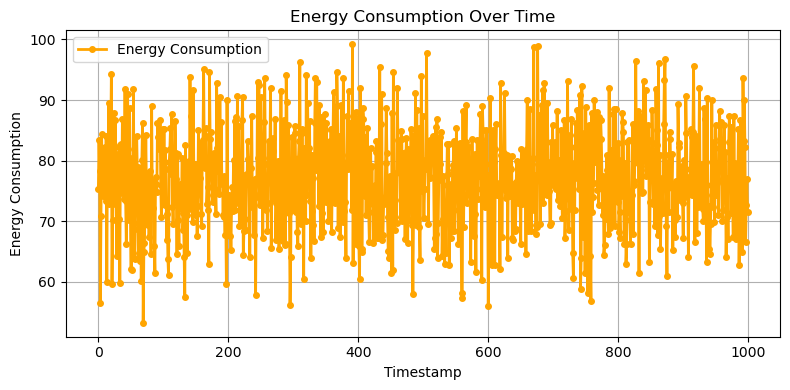

In [196]:
# We draw graphs for EnergyConsumption and Timestamp
plt.figure(figsize=(8, 4)) 
plt.plot(df['EnergyConsumption'], label='Energy Consumption', color='orange', linewidth=2, marker='o', markersize=4)
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.grid(True)  # We add the background lines.
plt.tight_layout()  
plt.show()

Text(0, 0.5, 'Load usage')

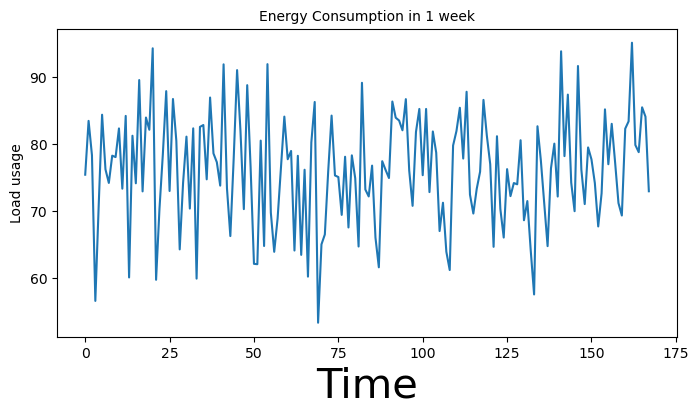

In [197]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Energy Consumption in 1 week",fontsize=10)
ax.set_xlabel('Time', fontsize=30)
start=0
end=24*7
ax.plot(df['EnergyConsumption'][start:end])
ax.set_ylabel("Load usage", fontsize=10)
#We draw a graph for Energy Consumption in 1 week

In [198]:
categorical_col = df.select_dtypes(include='object').columns
#We assigned the categorical columns to the categorical col value.

In [199]:
numeric_col = df.select_dtypes(exclude='object').columns
#We assigned the numerical columns to the categorical col value.

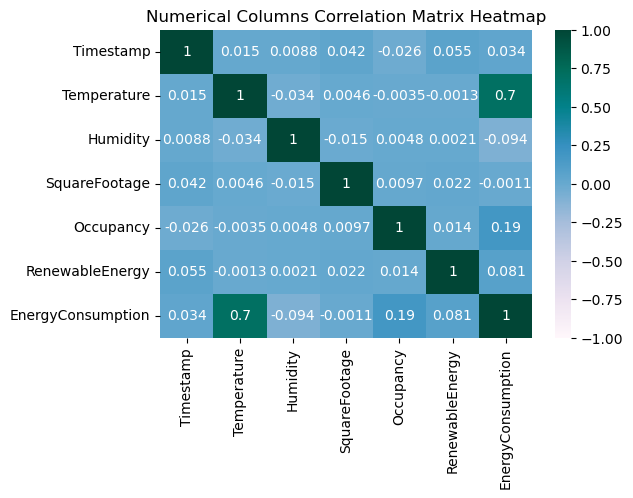

In [200]:
df_numeric = df[numeric_col]
corr_matrix_numeric = df_numeric.corr()

plt.figure(figsize=(6, 4)) 
sns.heatmap(corr_matrix_numeric, annot=True, cmap='PuBuGn', vmin=-1, vmax=1) 
plt.title('Numerical Columns Correlation Matrix Heatmap')
plt.show()

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)
/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)


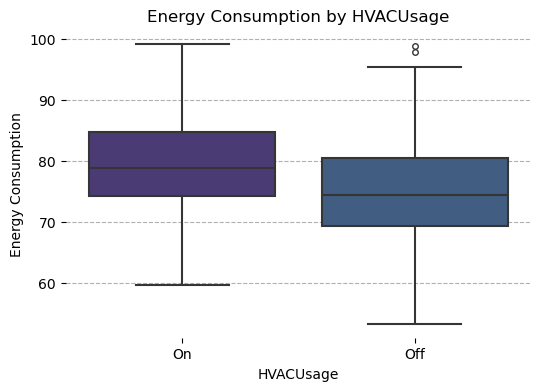

---------------------------------------------------------------------------------------------------


/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)
/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)


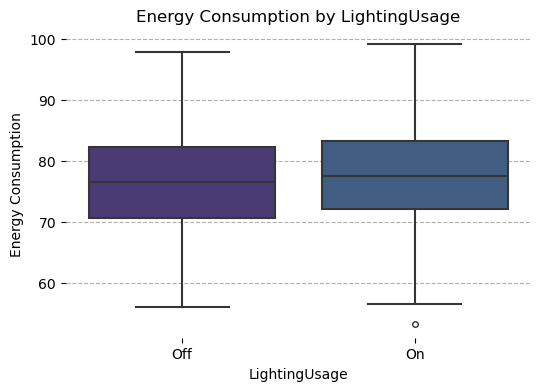

---------------------------------------------------------------------------------------------------


/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)
/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)


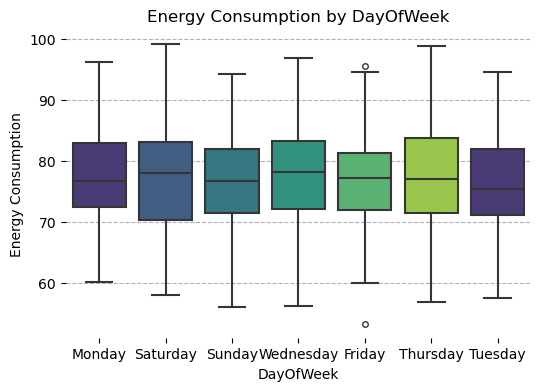

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)
/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_85166/4009918138.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)


---------------------------------------------------------------------------------------------------


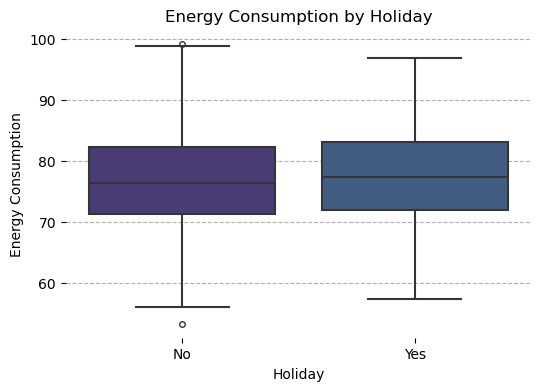

---------------------------------------------------------------------------------------------------


In [201]:
def col_summary(dataframe, categorical_col):
    plt.figure(figsize=(6, 4)) 
    colors = sns.color_palette("viridis")
    sns.boxplot(x=dataframe[categorical_col], y='EnergyConsumption', data=dataframe, palette=colors, linewidth=1.5, fliersize=4)
    colors = sns.color_palette("viridis")
    plt.title(f'Energy Consumption by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel('Energy Consumption')
    plt.grid(axis='y', linestyle='--') 
    sns.despine(left=True, bottom=True)  
    plt.show(block=True)
    print("---------------------------------------------------------------------------------------------------")
#We defined our graph.
#We printed our object columns with the value we assigned.
for col in categorical_col:
    col_summary(df, col)

In [202]:
print(df['Timestamp'])

0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
995   2022-02-11 11:00:00
996   2022-02-11 12:00:00
997   2022-02-11 13:00:00
998   2022-02-11 14:00:00
999   2022-02-11 15:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]


In [203]:
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['weekend']= df['DayOfWeek'].apply(lambda x: 1 if x == 6 else 0)
#we separate important time related features and create column.
total_energy_consumption = df.groupby('weekend')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_holiday=df.groupby('Holiday')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_LightingUsage=df.groupby('LightingUsage')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_DayOfWeek =df.groupby('DayOfWeek')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
#We calculate specific statistical summaries of our columns

In [204]:
#We tabulate our statistics. with IPython.display

def style_table(df):
    return df.style.set_properties(**{'text-align': 'center',
                                      'border-color': 'black',
                                      'border-width': '1px',
                                      'border-style': 'solid'})

print("Total Energy Consumption using weekend feature")
display(style_table(total_energy_consumption))
print("\nTotal Energy Consumption using holiday feature")
display(style_table(Total_energy_per_holiday))
print("\nTotal Energy Consumption LightingUsage feature")
display(style_table(Total_energy_per_LightingUsage))
print("\nTotal Energy Consumption DayOfWeek")
display(style_table(Total_energy_per_DayOfWeek))



Total Energy Consumption using weekend feature


,sum,mean,median,std
weekend,,,,
0,65984.952283,77.085225,77.030949,8.206387
1,11070.920585,76.881393,76.018518,7.788872



Total Energy Consumption using holiday feature


,sum,mean,median,std
Holiday,,,,
No,40840.610625,76.624035,76.308881,8.107184
Yes,36215.262244,77.548741,77.375131,8.166840



Total Energy Consumption LightingUsage feature


,sum,mean,median,std
LightingUsage,,,,
Off,38841.265968,76.308970,76.555025,8.143900
On,38214.606901,77.830157,77.553946,8.079929



Total Energy Consumption DayOfWeek


,sum,mean,median,std
DayOfWeek,,,,
0,10953.260311,76.064308,76.849443,8.810008
1,11143.413070,77.384813,77.399168,7.956658
2,10987.378826,76.301242,75.940012,8.277581
3,10962.329529,76.127288,76.211706,7.646813
4,10581.366978,77.804169,77.030873,8.238697
5,11357.203570,78.869469,78.535078,8.017480
6,11070.920585,76.881393,76.018518,7.788872


In [205]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,weekend
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,5,No,75.364373,0,1,0
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,5,No,83.401855,1,1,0
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,5,No,78.270888,2,1,0
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,5,No,56.519850,3,1,0
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,5,No,70.811732,4,1,0


In [206]:
df = df.drop(columns=['Timestamp'])

In [207]:
#We apply label encoding for categorical data based on the results from our graphs.
le = LabelEncoder()

In [208]:
df['HVACUsage'] = le.fit_transform(df['HVACUsage'])
df['LightingUsage'] = le.fit_transform(df['LightingUsage'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])

In [209]:
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
#Using the trained linear regression model, 
#we predicted the car prices in the test dataset and assigned these predictions to the y_pred_lr variable.
r2_lr = r2_score(y_test, y_pred_lr)
#We calculate the R-squared score.
mse_lr = mean_squared_error(y_test, y_pred_lr)
#We calculate the Mean Squared Error (MSE).
rmse_lr = np.sqrt(mse_lr)
#We calculate the Root Mean Squared Error (RMSE).
print("Linear Regression Results:")
print(f"R-squared: {r2_lr:.4f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}\n")

Linear Regression Results:
R-squared: 0.5981, MSE: 26.32, RMSE: 5.13



In [212]:
y_pred_df = pd.DataFrame({
    
    'y_pred Linear Regression': y_pred_lr
})

print(y_pred_df)

     y_pred Linear Regression
0                   83.408253
1                   81.491870
2                   75.809235
3                   88.393111
4                   75.537198
..                        ...
195                 86.716637
196                 69.739673
197                 80.442681
198                 87.220112
199                 67.584074

[200 rows x 1 columns]


In [213]:
#Ridge Regression
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 25.0, 35.0, 100.0]
#We select the best alpha value by performing cross validation on the list of alpha values.
ridge_cv = RidgeCV(alphas=alpha_values, cv=10)
ridge_cv.fit(X_train, y_train)

best_alpha_ridgecv = ridge_cv.alpha_
print(f"best alpha : {best_alpha_ridgecv}")
model_ridge_best = Ridge(alpha=best_alpha_ridgecv)
model_ridge_best.fit(X_train, y_train)
y_pred_ridge_best = model_ridge_best.predict(X_test)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)

print("\nRidge Regression Results (With Best Alpha):")
print(f"R-squared: {r2_ridge_best:.4f}, MSE: {mse_ridge_best:.2f}, RMSE: {rmse_ridge_best:.2f}\n")

#We obtained a value that approximates the standard linear regression of Ridge Regression.

best alpha : 10.0

Ridge Regression Results (With Best Alpha):
R-squared: 0.5970, MSE: 26.39, RMSE: 5.14



In [214]:
# Lasso Regression
alpha_values_lasso = np.logspace(-4, 0, 10)
#We select the best alpha value by performing cross validation on the list of alpha values.
lasso_cv = LassoCV(alphas=alpha_values_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lassocv = lasso_cv.alpha_
print(f"best alpha: {best_alpha_lassocv}")

model_lasso_best = Lasso(alpha=best_alpha_lassocv)
model_lasso_best.fit(X_train, y_train)
y_pred_lasso_best = model_lasso_best.predict(X_test)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mse_lasso_best)

print("\nLasso  Regression Results (With Best Alpha):")
print(f"R-squared: {r2_lasso_best:.4f}, MSE: {mse_lasso_best:.2f}, RMSE: {rmse_lasso_best:.2f}\n")

best alpha: 0.046415888336127774

Lasso  Regression Results (With Best Alpha):
R-squared: 0.5976, MSE: 26.36, RMSE: 5.13



In [215]:
# Polynomial  Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
#It gives the best result for degree 1, but let's look at the result for degree 2.

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("Polynomial   Regression Results:")
print(f"R-squared: {r2_poly:.4f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}\n")

Polynomial   Regression Results:
R-squared: 0.5555, MSE: 29.11, RMSE: 5.40



In [216]:
#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) 
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regressor Results:")
print(f"R-squared: {r2_rf:.4f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}\n")

Random Forest Regressor Results:
R-squared: 0.5442, MSE: 29.86, RMSE: 5.46



In [217]:
#Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting Regressor Results:")
print(f"R-squared: {r2_gb:.4f}, MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}\n")

Gradient Boosting Regressor Results:
R-squared: 0.5390, MSE: 30.19, RMSE: 5.49



In [218]:
print("--- Model Performance Summary ---")
print(f"Linear Regression - R-squared: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")
print(f"Ridge Regression     - R-squared: {r2_ridge_best:.4f}, RMSE: {rmse_ridge_best:.2f}")
print(f"Lasso Regression       - R-squared: {r2_lasso_best:.4f}, RMSE: {rmse_lasso_best:.2f}")
print(f"Polynomial  Regression - R-squared: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")
print(f"Random Forest Regressor   - R-squared: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")
print(f"Gradient Boosting Regressor    - R-squared: {r2_gb:.4f}, RMSE: {rmse_gb:.2f}")

--- Model Performance Summary ---
Linear Regression - R-squared: 0.5981, RMSE: 5.13
Ridge Regression     - R-squared: 0.5970, RMSE: 5.14
Lasso Regression       - R-squared: 0.5976, RMSE: 5.13
Polynomial  Regression - R-squared: 0.5555, RMSE: 5.40
Random Forest Regressor   - R-squared: 0.5442, RMSE: 5.46
Gradient Boosting Regressor    - R-squared: 0.5390, RMSE: 5.49


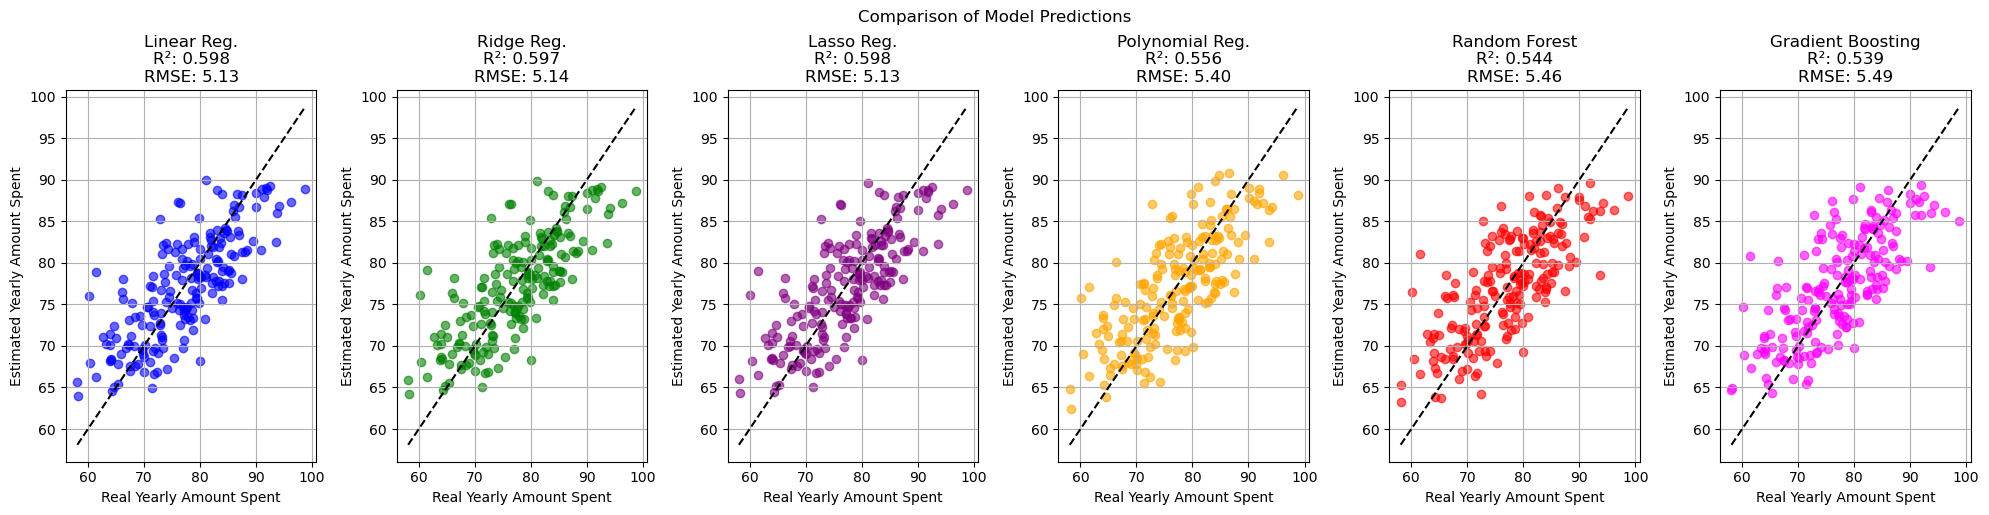

In [219]:
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 6, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Linear Reg.\nR²: {r2_score(y_test, y_pred_lr):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Ridge Regression
plt.subplot(1, 6, 2)
plt.scatter(y_test, y_pred_ridge_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Ridge Reg.\nR²: {r2_score(y_test, y_pred_ridge_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_best)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Lasso Regression
plt.subplot(1, 6, 3)
plt.scatter(y_test, y_pred_lasso_best, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Lasso Reg.\nR²: {r2_score(y_test, y_pred_lasso_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso_best)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 6, 4)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Polynomial Reg.\nR²: {r2_score(y_test, y_pred_poly):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Random Forest Regressor
plt.subplot(1, 6, 5)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Random Forest\nR²: {r2_score(y_test, y_pred_rf):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Gradient Boosting Regressor
plt.subplot(1, 6, 6)
plt.scatter(y_test, y_pred_gb, color='magenta', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Gradient Boosting\nR²: {r2_score(y_test, y_pred_gb):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of Model Predictions', y=1.02)
plt.show()

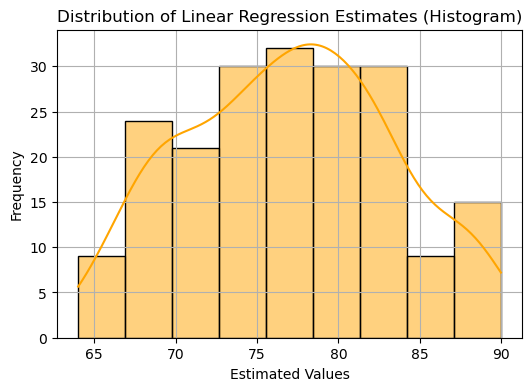

In [230]:
# 1. Histogram
plt.figure(figsize=(6, 4))
sns.histplot(y_pred_df['y_pred Linear Regression'], kde=True, color= 'orange')
plt.title('Distribution of Linear Regression Estimates (Histogram)')
plt.xlabel('Estimated Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [234]:
#Let's retrain our models by applying minmaxscaler.
#EnergyConsumption
if 'EnergyConsumption' not in df.columns:
    raise ValueError("Target column  not found in DataFrame.")
    
#We separate the target variable and our input features.
X_s = df.drop('EnergyConsumption', axis=1)
y_s = df['EnergyConsumption']

#We apply MinMaxScaler to our input features.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_s)

#We convert our scaled data into a dataframe.
X_scaled_df = pd.DataFrame(X_scaled, columns=X_s.columns)

print("Scaled Input Properties:")
print(X_scaled_df.head())
print("\nTarget Variable:")
print(y_s.head())

Scaled Input Properties:
   Temperature  Humidity  SquareFootage  Occupancy  HVACUsage  LightingUsage  \
0     0.513644  0.447887       0.565481   0.555556        1.0            0.0   
1     0.773096  0.808261       0.410770   0.111111        1.0            1.0   
2     0.870445  0.964564       0.755603   0.222222        0.0            0.0   
3     0.007297  0.679584       0.452043   0.111111        0.0            1.0   
4     0.309254  0.713964       0.093667   1.000000        1.0            0.0   

   RenewableEnergy  DayOfWeek  Holiday      Hour  Day  weekend  
0         0.092396   0.833333      0.0  0.000000  0.0      0.0  
1         0.728495   0.833333      0.0  0.043478  0.0      0.0  
2         0.225578   0.833333      0.0  0.086957  0.0      0.0  
3         0.287623   0.833333      0.0  0.130435  0.0      0.0  
4         0.102318   0.833333      0.0  0.173913  0.0      0.0  

Target Variable:
0    75.364373
1    83.401855
2    78.270888
3    56.519850
4    70.811732
Name: Energ

In [236]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y_s, test_size=0.2, random_state=42)

In [237]:
# Linear Regression
model_lr_s = LinearRegression()
model_lr_s.fit(X_train_s, y_train_s)
y_pred_lr_s = model_lr_s.predict(X_test_s)
#Using the trained linear regression model, 
#we predicted the car prices in the test dataset and assigned these predictions to the y_pred_lr variable.
r2_lr_s = r2_score(y_test_s, y_pred_lr_s)
#We calculate the R-squared score.
mse_lr_s = mean_squared_error(y_test_s, y_pred_lr_s)
#We calculate the Mean Squared Error (MSE).
rmse_lr_s = np.sqrt(mse_lr_s)
#We calculate the Root Mean Squared Error (RMSE).
print("Linear Regression Results:")
print(f"R-squared: {r2_lr_s:.4f}, MSE: {mse_lr_s:.2f}, RMSE: {rmse_lr_s:.2f}\n")

Linear Regression Results:
R-squared: 0.5981, MSE: 26.32, RMSE: 5.13



In [241]:
y_pred_df_scaled = pd.DataFrame({
    
    'y_pred Linear Regression': y_pred_lr_s
})

print(y_pred_df_scaled)

     y_pred Linear Regression
0                   83.408253
1                   81.491870
2                   75.809235
3                   88.393111
4                   75.537198
..                        ...
195                 86.716637
196                 69.739673
197                 80.442681
198                 87.220112
199                 67.584074

[200 rows x 1 columns]


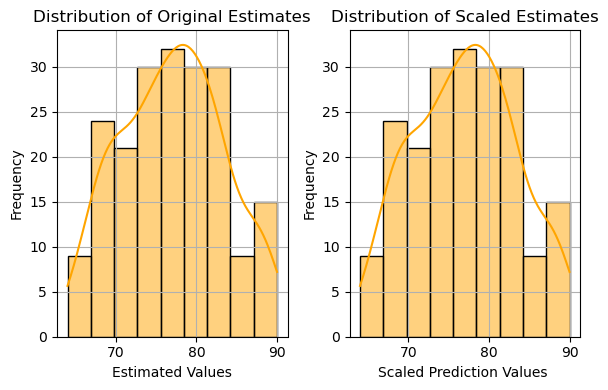

In [245]:
# scaled linear regression and linear regression results
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_pred_df['y_pred Linear Regression'], kde=True, color= 'orange')
plt.title('Distribution of Original Estimates')
plt.grid(True)
plt.xlabel('Estimated Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_pred_df_scaled['y_pred Linear Regression'], kde=True, color= 'orange')
plt.title('Distribution of Scaled Estimates')
plt.grid(True)
plt.xlabel('Scaled Prediction Values ​')
plt.ylabel('Frequency')

plt.tight_layout()